### импорт библиотек и вспомогательные функции

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Введение и импорт данных

когортный анализ  применяется, когда  нужно  сравнить поведение во времени между собой двух или более групп. В зависимости от поставленной задачи в когортном анализе важно четко зафиксировать ответы на следующие вопросы:

1) по какому признаку выделяем когорты?  
2) по какому показателю сравниваем когорты между собой?      

Посмотрим на конкретные примеры когортного анализа

In [2]:
data = pd.read_csv('KaggleDataset.csv')
#data['timestamp'] = pd.to_datetime(data['InvoiceDate'])

In [3]:
#from google.colab import files
#uploaded=files.upload()


In [0]:
#import io
#data = pd.read_csv(io.StringIO(uploaded['Online_Retail.csv'].decode('utf-8')),sep=',')

In [3]:
data.head()

,Unnamed: 0,Id,ScriptId,ParentScriptVersionId,ScriptLanguageId,AuthorUserId,CreationDate,VersionNumber,Title,EvaluationDate,...,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes,acquisition_day,delta,acquisition_period,activity_week,lifetime_period
0,0,9046233,2424869,NaN,5,367178,2019-01-01 00:00:06,25.0,Seattle Road Temperature Dashboard,01/01/2019,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
1,1,9046244,2518248,NaN,8,2607768,2019-01-01 00:01:14,NaN,kernel2da369914d,01/01/2019,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
2,2,9046250,2518405,NaN,8,2236338,2019-01-01 00:01:41,NaN,Fork of DogsVsCats_Keras Convnet ++_Kfold,01/01/2019,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
3,3,9046269,2406552,NaN,12,1162990,2019-01-01 00:02:46,15.0,World Bank EDA for Dashboard,01/01/2019,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
4,4,9046271,2408402,NaN,9,927924,2019-01-01 00:02:46,22.0,Dashboarding with Jupyter Notebooks,01/01/2019,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0


In [4]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'])
data['EvaluationDate'] = pd.to_datetime(data['EvaluationDate'])

In [5]:
data.head()

,Unnamed: 0,Id,ScriptId,ParentScriptVersionId,ScriptLanguageId,AuthorUserId,CreationDate,VersionNumber,Title,EvaluationDate,...,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes,acquisition_day,delta,acquisition_period,activity_week,lifetime_period
0,0,9046233,2424869,NaN,5,367178,2019-01-01 00:00:06,25.0,Seattle Road Temperature Dashboard,2019-01-01,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
1,1,9046244,2518248,NaN,8,2607768,2019-01-01 00:01:14,NaN,kernel2da369914d,2019-01-01,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
2,2,9046250,2518405,NaN,8,2236338,2019-01-01 00:01:41,NaN,Fork of DogsVsCats_Keras Convnet ++_Kfold,2019-01-01,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
3,3,9046269,2406552,NaN,12,1162990,2019-01-01 00:02:46,15.0,World Bank EDA for Dashboard,2019-01-01,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0
4,4,9046271,2408402,NaN,9,927924,2019-01-01 00:02:46,22.0,Dashboarding with Jupyter Notebooks,2019-01-01,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,0.0


In [6]:
data['ScriptLanguageId'].value_counts()

8     444460
9     372508
13     16204
12     14433
2      12049
14     11901
5       5963
16      2678
15      2380
1       2161
Name: ScriptLanguageId, dtype: int64

In [7]:
def visualize_all_data(df):
    data = df.copy()
    min_date = data['EvaluationDate'].min()
    max_date = data['EvaluationDate'].max()

    data['delta'] = (data['EvaluationDate'] - min_date).apply(lambda x: np.floor(x.days/7))


    g_data = data.groupby('AuthorUserId').first().reset_index()
    g_data['delta'] = (g_data['EvaluationDate'] - min_date).apply(lambda x: np.floor(x.days/7))

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    sns.distplot(g_data['delta'], kde=False,bins=bin_num, norm_hist=True, label='')
    plt.xlabel('Недели с начала наблюдения')

    plt.legend(labels=["Все взаимодействия со скриптами в эту неделю","Пользователи, пришедшие в эту неделю"])
    plt.show()
    print('начало наблюдения: '+ str(min_date))
    print('конец наблюдения: '+ str(max_date))

/Users/yaroslavanovoselova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


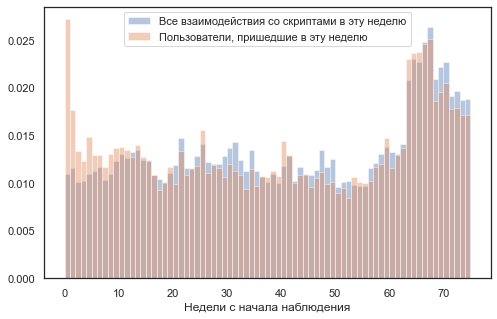

начало наблюдения: 2019-01-01 00:00:00
конец наблюдения: 2020-06-10 00:00:00


In [8]:
visualize_all_data(data)

#### Вывод:
На графике выделятся сильный приток новых пользователей под конец исследуемого периода времени, возможно, в это время сервис стал более популярным, удобным в использовании или изменил и доработал рекламную компанию. Также в середине рассматриваемого периода заметно некоторые резкие увеличения числа новых пользователей, однако за такими увеличениями почти сразу следует уменьшение притока. Увеличение пользователей может быть связано с рекламными акциями или другими спопосбами привличения клиентов. Изменения количества взаимодействий со скриптами коррелируют с увеличением/уменьшением притока новых пользователей. Так, в конце периода увеличивается количество испоьзования сервиса. В некоторые недели заметно, что количество взаимодействий со скриптами больше, чем количество новых пользователей, что свидетельствует о retention старых клиентов. 

мы видим, что данные собирались примерно полтора года. Т.е. для разных пользователей история наблюдения сильно варьируется. 

Как в этом случае делать аналитику, если мы, например, хотим измерить retention и  как он меняется со временем? 

Ответ - для этого используется когортный анализ. 

Пользователи разбираются на группы по определенным признакам и группы анализируются между собой. 

В простейшем варианте это может быть разбиение по времени присоединения. 

Пользователи присоединившиеся за первые неделю с начала наблюдения - это одна когорта

пользователи присоединившиеся тоже за недельный интервал, но спустя 60 дней - это будет другая когорта

Поведение пользователей можно пронаблюдать продолжительное время и сделать вывод о том, каким retention обладает каждая их когорт. На основе этого можно например сделать анализ - изменился ли у нас retention за 60 дней или нет

В данном случае наш анализ можно резюмировать:

1) по какому признаку выделяем когорты? - `acquisution time`  
2) по какому показателю сравниваем когорты между собой?  - `retention`

## 1. Выделение когорт по времени присоединения

In [9]:
#размер когорты (в этом примере этот параметр будет также использоваться как величина периода для наблюдений за когортой)
cohort_size = 14
#интервал времени между когортами для сравнения
interval_between_cohorts = 60

#найдем для пользоваателей их даты присоединения:
g_data = data.groupby('AuthorUserId')['EvaluationDate'].first().reset_index()
#колонка delta - день присоединения с начала наблюдения:
g_data['delta'] = (g_data['EvaluationDate'] - data['EvaluationDate'].min()).apply(lambda x: x.days)


#получим айдишники  пользователей присоединившихся в первую неделю и во вторую:
cohort_1_users = g_data[g_data['delta']<=cohort_size]['AuthorUserId'].unique()
cohort_2_users = g_data.loc[(g_data['delta']>interval_between_cohorts) &
                            (g_data['delta']<=interval_between_cohorts+cohort_size)]['AuthorUserId'].unique()

#полные логи событий для каждой из когорт:
data_c1 = data[data['AuthorUserId'].isin(cohort_1_users)].copy()
data_c2 = data[data['AuthorUserId'].isin(cohort_2_users)].copy()

Визуализируем теперь аналогично время регистрации новых событий/ новых пользователей для выделенных когорт:

In [10]:
def visualize_users(df):
    data = df.copy()
    min_date = data['EvaluationDate'].min()

    g_data = data.groupby('AuthorUserId').first().reset_index()
    g_data['delta'] = (g_data['EvaluationDate'] - min_date).apply(lambda x: x.days/7)

    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})

    sns.distplot(g_data['delta'], kde=False,bins=2, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения когортой')

    plt.legend(labels=["Пользователи, пришедшие в эту неделю"])
    plt.xlim([0,53])
    plt.show()
    print('начало наблюдения за когортой: '+ str(min_date))

def visualize_purchases(df):
    data = df.copy()
    min_date = data['EvaluationDate'].min()
    max_date = data['EvaluationDate'].max()

    data['delta'] = (data['EvaluationDate'] - min_date).apply(lambda x: np.floor(x.days/7))


    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения за когортой')

    plt.legend(labels=["Все скрипты в эту неделю"])
    plt.xlim([0,53])
    plt.show()
    print('начало наблюдения за когортой: '+ str(min_date))

/Users/yaroslavanovoselova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


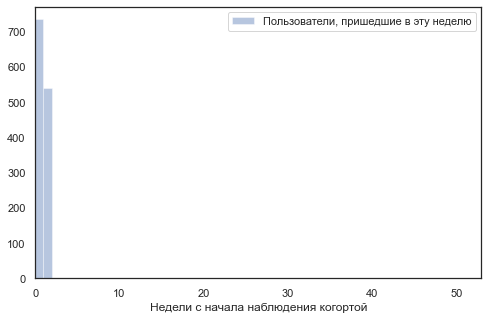

начало наблюдения за когортой: 2019-01-01 00:00:00


In [11]:
 visualize_users(data_c1)

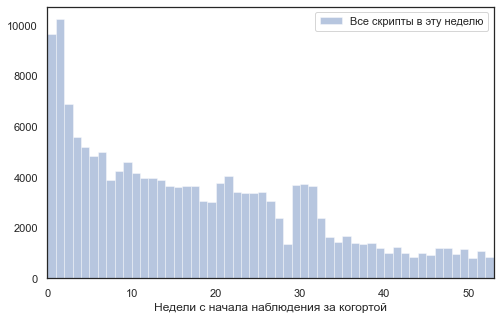

начало наблюдения за когортой: 2019-01-01 00:00:00


In [12]:
visualize_purchases(data_c1)

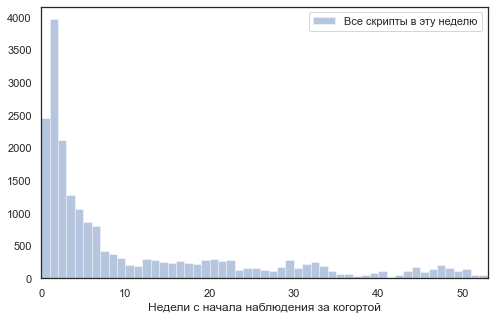

начало наблюдения за когортой: 2019-03-03 00:00:00


In [13]:
visualize_purchases(data_c2)

Мы видим, что теперь каждая из когорт содержит данных поведения пользователей пришедных в определенный интервал времени (первая и вторая неделя с начала наблюдения, соответсвенно) для которых мы отслеживали все дальнейшее поведеение в  течение года.

#### Вывод:
Также можно заметить, что retention в первой когорте выше, чем во второй, мы сможем далее проследить это на соответствующих графиках. Кроме того, можно говорить о некоторых событиях повлиявших на потерю пользователей в обоих когортах, так как они прослеживаются в общих провалах на графиках. Например, 28 неделя в первой когорте и 36-37 неделя во второй когорте, это один и тот же период, на котором заметен "провал"



Можем сравнить поведение когорт между собой.  

Например, можем построить, как убывала доля активных пользователей в каждой из когорт интервал к интервалу с момента начала наблюденя за когортой:

In [14]:
data_c1['delta'] = (data_c1['EvaluationDate'] - data_c1['EvaluationDate'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


data_c2['delta'] = (data_c2['EvaluationDate'] - data_c2['EvaluationDate'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


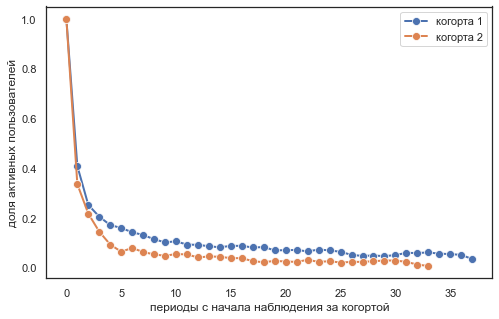

In [15]:
retention_c1 =  data_c1.groupby('delta')['AuthorUserId'].apply(lambda x: len(set(x)))
retention_c2 =  data_c2.groupby('delta')['AuthorUserId'].apply(lambda x: len(set(x)))


sns.lineplot(x = retention_c1.index, y = retention_c1.values/max(retention_c1.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_c2.index, y = retention_c2.values/max(retention_c2.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["когорта 1","когорта 2"])
plt.show()


#### Вывод:
Мы видим, что когорта первых двух недель 1го месяца (напомним - cohort_size был 14 дней, а две когорты брались с 60 дневной разницей) обладает более высоким retention, чем когорта пользователей первых двух недель 3-го месяца. 



Можно напримеер сравнить эти группы по другим признакам - например, по числу скриптов на человека.

In [16]:
purch_c1 =  data_c1.groupby('delta').apply(lambda x: len(x['ScriptId'])/x['AuthorUserId'].nunique())
purch_c2 =  data_c2.groupby('delta').apply(lambda x: len(x['ScriptId'])/x['AuthorUserId'].nunique())

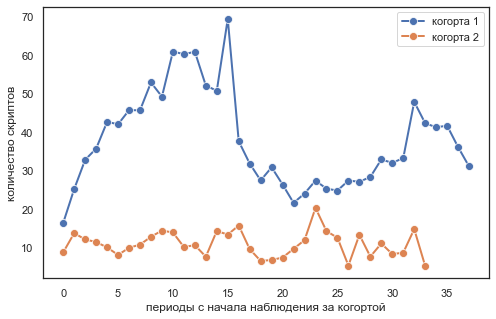

In [17]:
sns.lineplot(x = purch_c1.index, y = purch_c1.values,
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = purch_c2.index, y = purch_c2.values,
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой')
plt.ylabel('количество скриптов')

plt.legend(labels=["когорта 1","когорта 2"])
plt.show()

#### Вывод:
Видно, что когорта 1 - создавала значительно больше скриптов на человека, чем вторая, и, следовательно, чаще возвращалась на платформу. Это свидетельствует о том, что первая когорта более вовлечена в продукт. 


## 2. Выделение сегментов внутри когорт


Важно  помнить, что в общем случае, когорты можно выделять произвольным образом в зависимости от анализа. 

В примерее выше мы сделали  выделение когорт на основе acquisition time.

Давайте рассмотрим теперь другой способ выделения когорт, например по географическому признаку. Для этого опять изолируем пользователей пришедших за определенный  промежуток времени (например тоже за первые две недели наблюдения) и разобьем их на две когорты - пользователи из UK и не UK

In [18]:
#найдем для пользоваателей их даты присоединения:
g_data = data.groupby('AuthorUserId')['EvaluationDate'].first().to_frame()
#колонка delta - день присоединения с начала наблюдения:
g_data['delta'] = (g_data['EvaluationDate'] - data['EvaluationDate'].min()).apply(lambda x: x.days)


In [19]:
data['acquisition_day'] = data['AuthorUserId'].map(g_data['delta'].to_dict())

In [20]:
data['ScriptLanguageId'].value_counts()

8     444460
9     372508
13     16204
12     14433
2      12049
14     11901
5       5963
16      2678
15      2380
1       2161
Name: ScriptLanguageId, dtype: int64

Разделим когорты на сегменты по используемуму языку: первая когорта язык с Id 8, вторая -- 9, третья -- все остальные:

In [21]:
data['ScriptLanguageId'] = pd.to_numeric(data['ScriptLanguageId'])
data['AuthorUserId'] = pd.to_numeric(data['AuthorUserId'])

In [22]:
cohort_size =  14

cohort_1_users = data.loc[(data['acquisition_day']<=cohort_size) &
                          (data['ScriptLanguageId']==8)]['AuthorUserId'].unique()

cohort_2_users = data.loc[(data['acquisition_day']<=cohort_size) &
                          (data['ScriptLanguageId']==9)]['AuthorUserId'].unique()
cohort_3_users = data.loc[(data['acquisition_day']<=cohort_size) &
                          (data['ScriptLanguageId']!=9)& (data['ScriptLanguageId']!=8)]['AuthorUserId'].unique()

#полные логи событий для каждой из когорт:
data_c1 = data[data['AuthorUserId'].isin(cohort_1_users)].copy()
data_c2 = data[data['AuthorUserId'].isin(cohort_2_users)].copy()
data_c3 = data[data['AuthorUserId'].isin(cohort_3_users)].copy()

Далее можем провести сравнителньый анализ аналогичный проделанному выше по выделенным  когортам:

In [23]:
data_c1['delta'] = (data_c1['EvaluationDate'] - data_c1['EvaluationDate'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


data_c2['delta'] = (data_c2['EvaluationDate'] - data_c2['EvaluationDate'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))
data_c3['delta'] = (data_c3['EvaluationDate'] - data_c3['EvaluationDate'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


In [24]:
cohort_1_users

array([2607768, 2236338, 1770802, ..., 1191436, 1797982,  684804])

In [25]:
data_c1.head()

,Unnamed: 0,Id,ScriptId,ParentScriptVersionId,ScriptLanguageId,AuthorUserId,CreationDate,VersionNumber,Title,EvaluationDate,...,LinesInsertedFromFork,LinesDeletedFromFork,LinesChangedFromFork,LinesUnchangedFromFork,TotalVotes,acquisition_day,delta,acquisition_period,activity_week,lifetime_period
0,0,9046233,2424869,NaN,5,367178,2019-01-01 00:00:06,25.0,Seattle Road Temperature Dashboard,2019-01-01,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0
1,1,9046244,2518248,NaN,8,2607768,2019-01-01 00:01:14,NaN,kernel2da369914d,2019-01-01,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2,9046250,2518405,NaN,8,2236338,2019-01-01 00:01:41,NaN,Fork of DogsVsCats_Keras Convnet ++_Kfold,2019-01-01,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0
3,3,9046269,2406552,NaN,12,1162990,2019-01-01 00:02:46,15.0,World Bank EDA for Dashboard,2019-01-01,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0
4,4,9046271,2408402,NaN,9,927924,2019-01-01 00:02:46,22.0,Dashboarding with Jupyter Notebooks,2019-01-01,...,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0


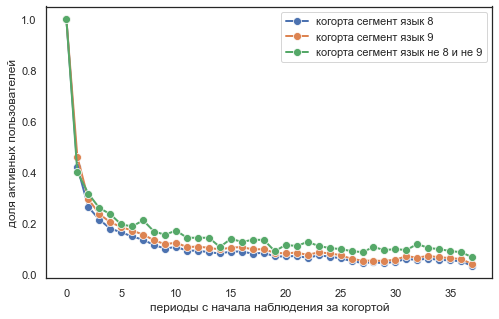

In [26]:
retention_c1 =  data_c1.groupby('delta')['AuthorUserId'].apply(lambda x: len(set(x)))
retention_c2 =  data_c2.groupby('delta')['AuthorUserId'].apply(lambda x: len(set(x)))
retention_c3 =  data_c3.groupby('delta')['AuthorUserId'].apply(lambda x: len(set(x)))


sns.lineplot(x = retention_c1.index, y = retention_c1.values/max(retention_c1.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_c2.index, y = retention_c2.values/max(retention_c2.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_c3.index, y = retention_c3.values/max(retention_c3.values),
             lw = 2, marker="o", markersize = 8)


plt.xlabel('периоды с начала наблюдения за когортой')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["когорта сегмент язык 8","когорта сегмент язык 9","когорта сегмент язык не 8 и не 9"])
plt.show()


#### Вывод:
Можно заметить, что retention у всех сегментов изменяется примерно одинаково, однако у пользователей третьего сегмента больше вовлеченность и ей более свойственны скачки. Возможно, это связано с тем, что третий сегмент использует менее популярные языки, и поэтому у них меньше вариантов альтернативных платформ, из-за чего они вынуждены возвращаться на исследуемую нами. Также некоторые скачки на графиках могут быть связаны с введением нового языка на платформу, что стимулирует старых пользователей оставаться на платформе. Доля активных пользователей у первого и второго сегмента изменяется примерно аналогично. 
Кроме того, важно указать на один нюанс выделения таких сегментов: один пользователь может попасть в несколько сегментов одновременно, тк один и тот же пользователь может использовать несколько языков одновременно. 

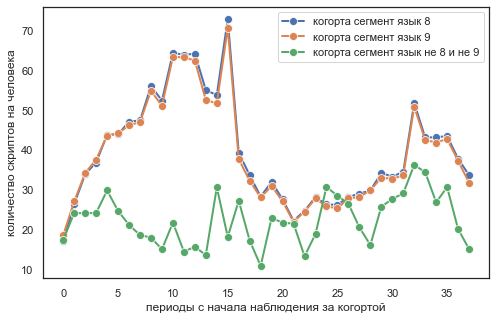

In [29]:
conv_c1 =  data_c1.groupby('delta').apply(lambda x: (len(x['ScriptId'])/x['AuthorUserId'].nunique()))
conv_c2 =  data_c2.groupby('delta').apply(lambda x: (len(x['ScriptId'])/x['AuthorUserId'].nunique()))
conv_c3 =  data_c3.groupby('delta').apply(lambda x: (len(x['ScriptId'])/x['AuthorUserId'].nunique()))

sns.lineplot(x = conv_c1.index, y = conv_c1.values,
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = conv_c2.index, y = conv_c2.values,
             lw = 2, marker="o", markersize = 8)
sns.lineplot(x = conv_c3.index, y = conv_c3.values,
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за когортой')
plt.ylabel('количество скриптов на человека')

plt.legend(labels=["когорта сегмент язык 8","когорта сегмент язык 9","когорта сегмент язык не 8 и не 9"])
plt.show()

#### Вывод:
На этои графике также заметно, что сегменты 8 и 9 ведут себя практически одинаково, это может быть связано с тем, что, как указывалось выше, там учитываются одни и те же пользователи, которые пишут скрипты на 8 и на 9 языке одновременно. Это требует дополнительного исследования. Сильно меньше, особенно в начале периода, происходит взаимодействия со скриптами в третьем сегменте, возможно, это связано, что эти языке менее популярны и поэтому нет надобности в их частом использовании. 


## 3.  Когортная матрица retention для многих групп:

В  примерах выше мы сравнивали между собой поведение двух групп. В аналитике часто применяется способ визуализации retention через когортную матрицу, который позволяет наглядно оценить как меняется retention (доля активных пользователей) для различных когорт разбитых по времени присоединения.

Для этого различные когорты пользоваателей выделяются в строки, а столбцы означают номер недели с момента начала наблюдения за когортой. Таким образом поолучается диагональная матрица, так  как период наблюдения за более раннеей когортой пользователей будет дольше, чем за когортой недавно присоединившихся пользователей.



In [30]:
data['delta'] = (data['EvaluationDate']-data['EvaluationDate'].min()).apply(lambda x: x.days)

In [31]:
#за интервал возьмем 1 месяц:
cohort_size = 30

data['acquisition_period'] = data['acquisition_day'].apply(lambda  x: np.floor(x / cohort_size))
data['activity_week'] = data['delta'].apply(lambda  x: np.floor(x / cohort_size))
data['lifetime_period'] =  data['activity_week'] - data['acquisition_period']

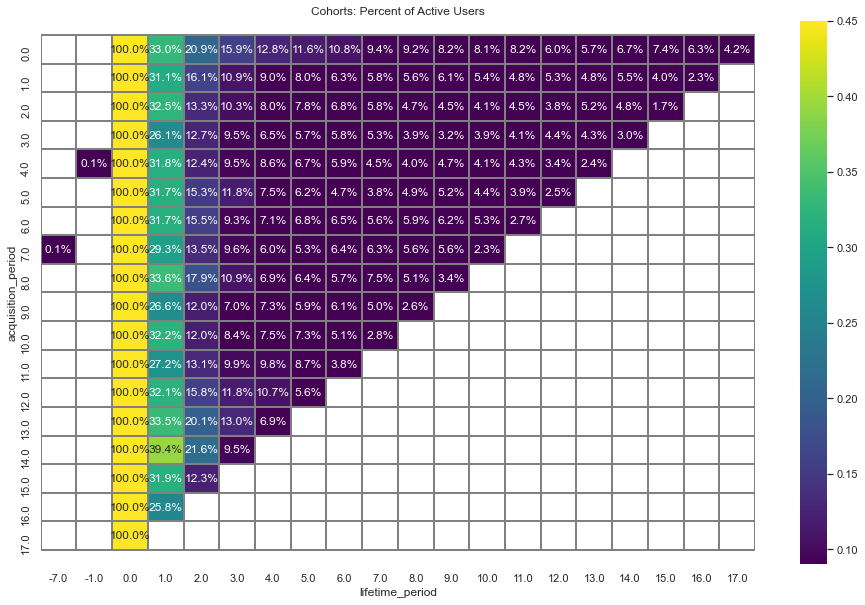

In [32]:
cohorts = data.groupby(['acquisition_period','lifetime_period']).agg({'AuthorUserId':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['lifetime_period'] == 0][['acquisition_period','AuthorUserId']]
inital_users_count = inital_users_count.rename(columns={'AuthorUserId':'cohort_users'})


cohorts = cohorts.merge(inital_users_count,on='acquisition_period')
cohorts['metric'] = cohorts['AuthorUserId']/cohorts['cohort_users']

cohort_metric_pivot = cohorts.pivot_table(index='acquisition_period',
                                      columns='lifetime_period'
                                      ,values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Cohorts: Percent of Active Users')
sns.heatmap(cohort_metric_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='viridis',
            vmin=0.09, vmax=0.45,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

Строки в данной матрице, выделяющиеся более высокими значениями от остальных строк - когорты пользователей с более высокой активностью. 

#### Вывод:
Можно заметить, что у более поздних когорт увеличивается retention на второй месяц. Поэтому можно говорить о некотором улучшении сервиса, а также, возможно, о нацеленности бизнес стратегии на удержание пользователей и эволюцию в этом направлении. Кроме того, видимо, у маркетинговых кампаний, привлекающих пользователей, улучшилось таргетирование, и они стали приводить более целевую аудиторию. Особенно высокуб активность мы видим у 14ой когорты, возможно, в это время произходили какие-то рекламные кампании, акции или улучшился функционал сервиса. 

# 4. Выделение сегментов в когортной матрице

Когортная матрица для пользователей, использующий язык с Id 8:

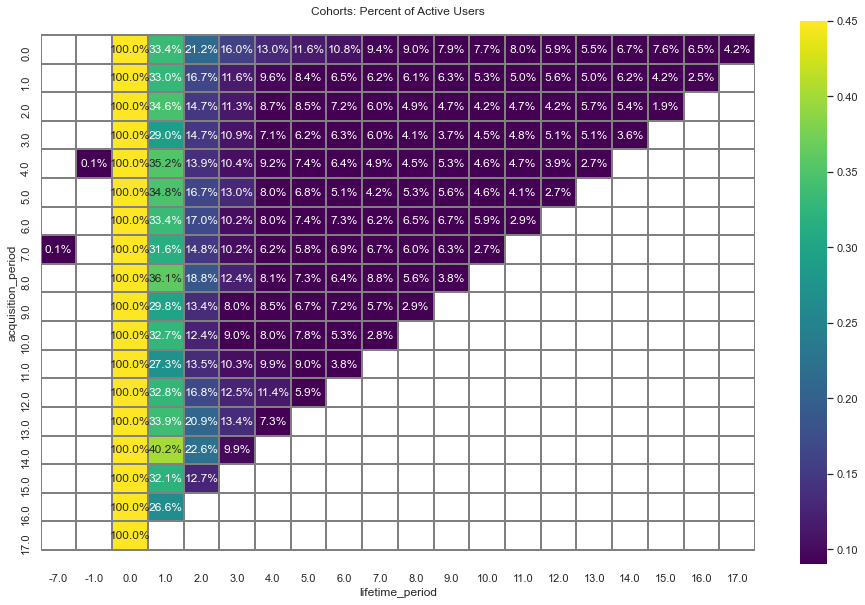

In [33]:
cohorts = data[data['ScriptLanguageId']==8].groupby(['acquisition_period','lifetime_period']).agg({'AuthorUserId':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['lifetime_period'] == 0][['acquisition_period','AuthorUserId']]
inital_users_count = inital_users_count.rename(columns={'AuthorUserId':'cohort_users'})


cohorts = cohorts.merge(inital_users_count,on='acquisition_period')
cohorts['metric'] = cohorts['AuthorUserId']/cohorts['cohort_users']

cohort_metric_pivot = cohorts.pivot_table(index='acquisition_period',
                                      columns='lifetime_period'
                                      ,values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Cohorts: Percent of Active Users')
sns.heatmap(cohort_metric_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='viridis',
            vmin=0.09, vmax=0.45,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

Когортная матрица для пользователей, использующий язык с Id 9:

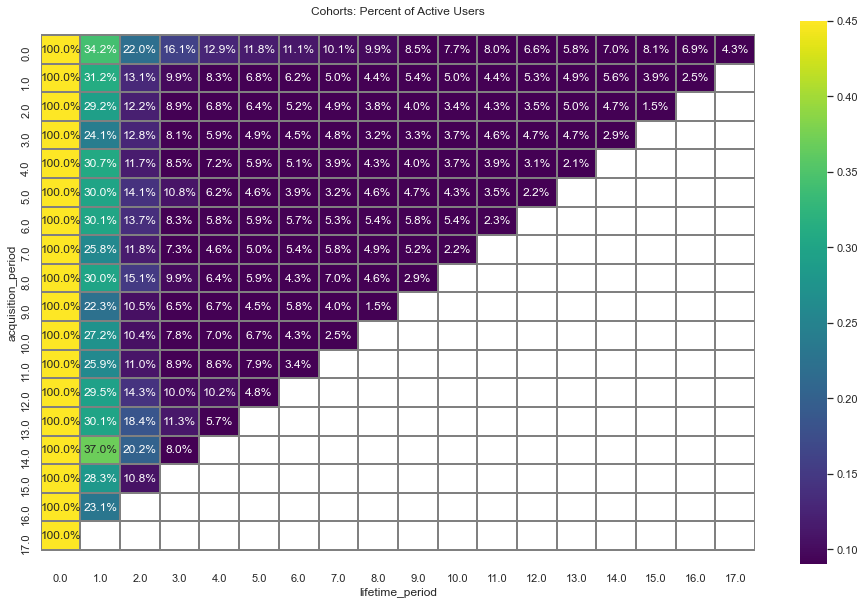

In [34]:
cohorts = data[data['ScriptLanguageId']==9].groupby(['acquisition_period','lifetime_period']).agg({'AuthorUserId':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['lifetime_period'] == 0][['acquisition_period','AuthorUserId']]
inital_users_count = inital_users_count.rename(columns={'AuthorUserId':'cohort_users'})


cohorts = cohorts.merge(inital_users_count,on='acquisition_period')
cohorts['metric'] = cohorts['AuthorUserId']/cohorts['cohort_users']

cohort_metric_pivot = cohorts.pivot_table(index='acquisition_period',
                                      columns='lifetime_period'
                                      ,values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Cohorts: Percent of Active Users')
sns.heatmap(cohort_metric_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='viridis',
            vmin=0.09, vmax=0.45,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

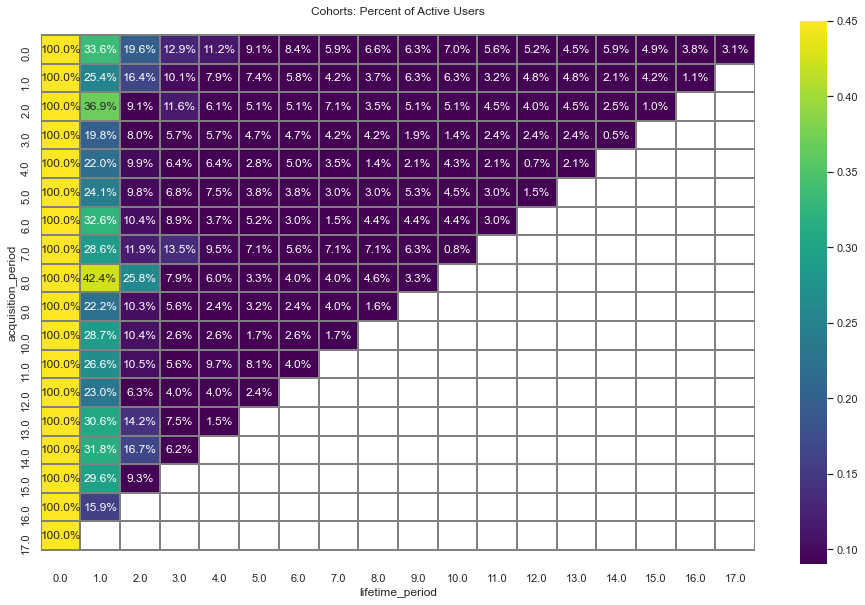

In [36]:
cohorts = data[(data['ScriptLanguageId']!=9) & (data['ScriptLanguageId']!=8)].groupby(['acquisition_period','lifetime_period']).agg({'AuthorUserId':'nunique'}).reset_index()

inital_users_count = cohorts[cohorts['lifetime_period'] == 0][['acquisition_period','AuthorUserId']]
inital_users_count = inital_users_count.rename(columns={'AuthorUserId':'cohort_users'})


cohorts = cohorts.merge(inital_users_count,on='acquisition_period')
cohorts['metric'] = cohorts['AuthorUserId']/cohorts['cohort_users']

cohort_metric_pivot = cohorts.pivot_table(index='acquisition_period',
                                      columns='lifetime_period'
                                      ,values='metric',
                                      aggfunc='sum')

sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

plt.title('Cohorts: Percent of Active Users')
sns.heatmap(cohort_metric_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='viridis',
            vmin=0.09, vmax=0.45,)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.show();

#### Вывод:
Примерно у всех выдленных сегментов retention изменяется примерно одинаково: снижение и увеличение коэффицента происходит в одни и те же периоды. Однако, есть некоторые отличия, например, у восьмой когорты третьего сегмента достаточно высокий retention, как по сравнению с другими когортами этого сегмента, так и по сравнению с той же когортой других сегментов. Также у третьего сегмента во втором месяце средний retention меньше, чем у других сегментов, самый высокий средний retention в этот период наблюдается у первого сегмента. К концу наблюдений retention у первого и второго сегмента становится примерно одинаковым, у третьего -- ниже на один процент. Поэтому, возиожно, компании стоит обратить внимание на вовлеченность пользователей третьего сегмента и попробовать ее повысить, но также не стоит забывать и про других пользователей. Компании стоит сфокусироватьс] на удержании пользователей после одного месяца использования продукта и далее. 